# Performing EDA on my KingSpec SSD sales sold via Jumia E-Commerce Website
On this project, I will be using my Jumia SSD sales data for an Exploratory Data Analysis (EDA) project to gain insights into my business, understand market dynamics, and showcase my data analytics skills in my portfolio. Since I have been selling SSDs for six months, this real-world dataset brings authenticity and relevance, especially for my business, Display SolutionsKE, and my goal of landing data analytics roles. Below, I’ll outline a structured approach to conducting EDA on your Jumia data, suggest specific analyses to uncover valuable insights, and provide ideas to enhance the project for my portfolio. I’ll also incorporate ways to make it stand out, including leveraging local Kenyan context as i've previously expressed interest in.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)


In [2]:
# Read in the dataset from the uploaded CSV file
df = pd.read_csv('/kaggle/input/ssd-sales-from-jumia/orders_export-1750665936910.csv')


## 1) Understand and Prepare my Data
**Objective**: Ensure the Jumia sales data is clean and ready for analysis to derive reliable insights.

- **Data Collection**: Confirm the data you’ve extracted from Jumia. Typical e-commerce sales data might include:
  - **Product Details**: SSD brand (e.g., KingSpec), model, storage capacity (e.g., 256GB, 512GB).
  - **Sales Metrics**: Units sold, revenue, price per unit, discounts applied.
  - **Customer Data**: Location (e.g., city/region in Kenya), customer ratings, reviews.
  - **Time Data**: Date/time of sales, delivery times.
  - **Order Details**: Order ID, payment method (e.g., M-Pesa, card), shipping method.

- **Data Cleaning**:
  - Handle missing values (e.g., impute average price for missing entries or drop incomplete records).
  - Standardize formats (e.g., consistent date formats like YYYY-MM-DD).
  - Remove duplicates (e.g., duplicate order IDs).
  - Categorize data (e.g., group SSD capacities into bins like <256GB, 256-512GB, >512GB).

- **Tools**: Use Python (Pandas, NumPy) for cleaning. Additionally, for visualization tools, I will import cleaned data into Tableau for later steps.

In [3]:
# Lets explore the dataset
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Seller Sku,Sku,Created At,Updated At,Order Number,Customer First Name,Customer Last Name,National Registration Number,Shipping Address,Shipping City,...,Variation,Shipment Provider,Shipment Type,Shipping Provider Type,Tracking Code,Tracking URL,Package Gross Weight,Package Volumetric Weight,Premium,Status
0,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-21 12:20:11,2025-06-23 09:31:24,399842627,Charles,Gachoru,NaN,gikambura,Kikuyu/Gitaru/Kanyariri/Muguga,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-NAX-399842627-0766,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Ready To Ship
1,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-20 13:35:12,2025-06-21 12:52:50,373593227,victor,ogai,NaN,Fortify Kakamega Station - Fortify kakamega st...,Kakamega Town,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-KAC-373593227-0993,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Shipped
2,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-18 18:30:17,2025-06-19 13:32:55,358538227,Francis,Oduor,NaN,Jumia Lakeland Kondele Station - Jumia Lakela...,Kondele/Migosi/ Lolwe/Carwash/Kibos,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-KCR-358538227-4310,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Shipped
3,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-14 05:10:11,2025-06-20 02:40:29,324997427,Lawrence,Mwangi,NaN,TRD Zimmerman Station - TRD Zimmerman station ...,Roysambu/Zimmerman,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-NJW-324997427-4330,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Returned
4,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-13 08:25:16,2025-06-17 11:43:56,372259427,Aloise,Koomu,NaN,Jumia Voi Station - Jumia Kimcindy Voi Station...,Voi,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-CHT-372259427-1645,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Delivered


In [4]:
# Let us check how big the dataset is

df.shape

(58, 28)

In [5]:
# What descriptive statistics can we quickly check out on the dataset
df.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Order Number,National Registration Number,Shipping Postal Code,Paid Price,Unit Price,Shipping Fee,Wallet Credits,Variation,Shipping Provider Type,Package Gross Weight,Package Volumetric Weight
count,5.800000e+01,0.0,0.0,58.000000,58.000000,58.000000,58.0,0.0,0.0,0.0,0.0
mean,3.592249e+08,NaN,NaN,5025.344828,5026.206897,164.810345,0.0,NaN,NaN,NaN,NaN
std,2.587304e+07,NaN,NaN,10816.844923,10816.629956,99.486305,0.0,NaN,NaN,NaN,NaN
min,3.138215e+08,NaN,NaN,2350.000000,2400.000000,30.000000,0.0,NaN,NaN,NaN,NaN
25%,3.379333e+08,NaN,NaN,2400.000000,2400.000000,131.750000,0.0,NaN,NaN,NaN,NaN
50%,3.588309e+08,NaN,NaN,2400.000000,2400.000000,170.000000,0.0,NaN,NaN,NaN,NaN
75%,3.828299e+08,NaN,NaN,4200.000000,4200.000000,180.000000,0.0,NaN,NaN,NaN,NaN
max,3.998426e+08,NaN,NaN,85020.000000,85020.000000,800.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
# What formart is the data
df.dtypes

Seller Sku                       object
Sku                              object
Created At                       object
Updated At                       object
Order Number                      int64
Customer First Name              object
Customer Last Name               object
National Registration Number    float64
Shipping Address                 object
Shipping City                    object
Shipping Postal Code            float64
Shipping Country                 object
Prepayment                       object
Paid Price                      float64
Unit Price                      float64
Shipping Fee                    float64
Wallet Credits                  float64
Item Name                        object
Variation                       float64
Shipment Provider                object
Shipment Type                    object
Shipping Provider Type          float64
Tracking Code                    object
Tracking URL                     object
Package Gross Weight            float64



### Step 2: Data Preperation¶

- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation



In [7]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Seller Sku,Sku,Created At,Updated At,Order Number,Customer First Name,Customer Last Name,National Registration Number,Shipping Address,Shipping City,...,Variation,Shipment Provider,Shipment Type,Shipping Provider Type,Tracking Code,Tracking URL,Package Gross Weight,Package Volumetric Weight,Premium,Status
0,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-21 12:20:11,2025-06-23 09:31:24,399842627,Charles,Gachoru,NaN,gikambura,Kikuyu/Gitaru/Kanyariri/Muguga,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-NAX-399842627-0766,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Ready To Ship
1,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-20 13:35:12,2025-06-21 12:52:50,373593227,victor,ogai,NaN,Fortify Kakamega Station - Fortify kakamega st...,Kakamega Town,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-KAC-373593227-0993,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Shipped
2,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-18 18:30:17,2025-06-19 13:32:55,358538227,Francis,Oduor,NaN,Jumia Lakeland Kondele Station - Jumia Lakela...,Kondele/Migosi/ Lolwe/Carwash/Kibos,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-KCR-358538227-4310,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Shipped
3,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-14 05:10:11,2025-06-20 02:40:29,324997427,Lawrence,Mwangi,NaN,TRD Zimmerman Station - TRD Zimmerman station ...,Roysambu/Zimmerman,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-NJW-324997427-4330,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Returned
4,P3-256,KI109EA5WWKI8NAFAMZ-443882870,2025-06-13 08:25:16,2025-06-17 11:43:56,372259427,Aloise,Koomu,NaN,Jumia Voi Station - Jumia Kimcindy Voi Station...,Voi,...,NaN,KE-VDO-Own-Kantaria-Station,Dropshipping,NaN,DS-CHT-372259427-1645,https://packagetracker-services.jumia.com/#/KE...,NaN,NaN,No,Delivered


In [8]:
# List the column names
df.columns

Index(['Seller Sku', 'Sku', 'Created At', 'Updated At', 'Order Number',
       'Customer First Name', 'Customer Last Name',
       'National Registration Number', 'Shipping Address', 'Shipping City',
       'Shipping Postal Code', 'Shipping Country', 'Prepayment', 'Paid Price',
       'Unit Price', 'Shipping Fee', 'Wallet Credits', 'Item Name',
       'Variation', 'Shipment Provider', 'Shipment Type',
       'Shipping Provider Type', 'Tracking Code', 'Tracking URL',
       'Package Gross Weight', 'Package Volumetric Weight', 'Premium',
       'Status'],
      dtype='object')

In [9]:
# Quick shortcut to drop irrelevant column names

df = df[['Seller Sku', #'Sku', 
         'Created At', 'Updated At', #'Order Number',
         'Customer First Name', 'Customer Last Name',#'National Registration Number', 
         'Shipping Address', 'Shipping City',# 'Shipping Postal Code', 'Shipping Country', 
         'Prepayment', 'Paid Price',
         'Unit Price', 'Shipping Fee', #'Wallet Credits', 
         'Item Name',#'Variation', 'Shipment Provider', 'Shipment Type','Shipping Provider Type', 'Tracking Code', 'Tracking URL','Package Gross Weight', 'Package Volumetric Weight', 'Premium',
         'Status']].copy()

In [10]:
df.columns

Index(['Seller Sku', 'Created At', 'Updated At', 'Customer First Name',
       'Customer Last Name', 'Shipping Address', 'Shipping City', 'Prepayment',
       'Paid Price', 'Unit Price', 'Shipping Fee', 'Item Name', 'Status'],
      dtype='object')

In [11]:
df.head()

,Seller Sku,Created At,Updated At,Customer First Name,Customer Last Name,Shipping Address,Shipping City,Prepayment,Paid Price,Unit Price,Shipping Fee,Item Name,Status
0,P3-256,2025-06-21 12:20:11,2025-06-23 09:31:24,Charles,Gachoru,gikambura,Kikuyu/Gitaru/Kanyariri/Muguga,No,2400.0,2400.0,300.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Ready To Ship
1,P3-256,2025-06-20 13:35:12,2025-06-21 12:52:50,victor,ogai,Fortify Kakamega Station - Fortify kakamega st...,Kakamega Town,No,2350.0,2400.0,235.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
2,P3-256,2025-06-18 18:30:17,2025-06-19 13:32:55,Francis,Oduor,Jumia Lakeland Kondele Station - Jumia Lakela...,Kondele/Migosi/ Lolwe/Carwash/Kibos,No,2400.0,2400.0,150.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
3,P3-256,2025-06-14 05:10:11,2025-06-20 02:40:29,Lawrence,Mwangi,TRD Zimmerman Station - TRD Zimmerman station ...,Roysambu/Zimmerman,No,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Returned
4,P3-256,2025-06-13 08:25:16,2025-06-17 11:43:56,Aloise,Koomu,Jumia Voi Station - Jumia Kimcindy Voi Station...,Voi,No,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered


In [12]:
# New DataFrame size
df.shape

(58, 13)

We have dropped from 28 columns to 13 columns which we will work with going forward.

In [13]:
df.describe()

,Paid Price,Unit Price,Shipping Fee
count,58.000000,58.000000,58.000000
mean,5025.344828,5026.206897,164.810345
std,10816.844923,10816.629956,99.486305
min,2350.000000,2400.000000,30.000000
25%,2400.000000,2400.000000,131.750000
50%,2400.000000,2400.000000,170.000000
75%,4200.000000,4200.000000,180.000000
max,85020.000000,85020.000000,800.000000


In [14]:
df.dtypes

Seller Sku              object
Created At              object
Updated At              object
Customer First Name     object
Customer Last Name      object
Shipping Address        object
Shipping City           object
Prepayment              object
Paid Price             float64
Unit Price             float64
Shipping Fee           float64
Item Name               object
Status                  object
dtype: object

In [15]:
df.columns

Index(['Seller Sku', 'Created At', 'Updated At', 'Customer First Name',
       'Customer Last Name', 'Shipping Address', 'Shipping City', 'Prepayment',
       'Paid Price', 'Unit Price', 'Shipping Fee', 'Item Name', 'Status'],
      dtype='object')

In [16]:
# Let us rename the columns for better interpretation

df = df.rename(columns={'Created At': 'Order Date',
                        'Updated At':'Dropoff Date'})

In [17]:
df.head(10)

,Seller Sku,Order Date,Dropoff Date,Customer First Name,Customer Last Name,Shipping Address,Shipping City,Prepayment,Paid Price,Unit Price,Shipping Fee,Item Name,Status
0,P3-256,2025-06-21 12:20:11,2025-06-23 09:31:24,Charles,Gachoru,gikambura,Kikuyu/Gitaru/Kanyariri/Muguga,No,2400.0,2400.0,300.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Ready To Ship
1,P3-256,2025-06-20 13:35:12,2025-06-21 12:52:50,victor,ogai,Fortify Kakamega Station - Fortify kakamega st...,Kakamega Town,No,2350.0,2400.0,235.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
2,P3-256,2025-06-18 18:30:17,2025-06-19 13:32:55,Francis,Oduor,Jumia Lakeland Kondele Station - Jumia Lakela...,Kondele/Migosi/ Lolwe/Carwash/Kibos,No,2400.0,2400.0,150.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
3,P3-256,2025-06-14 05:10:11,2025-06-20 02:40:29,Lawrence,Mwangi,TRD Zimmerman Station - TRD Zimmerman station ...,Roysambu/Zimmerman,No,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Returned
4,P3-256,2025-06-13 08:25:16,2025-06-17 11:43:56,Aloise,Koomu,Jumia Voi Station - Jumia Kimcindy Voi Station...,Voi,No,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
5,NX-512 2280,2025-06-12 21:00:15,2025-06-13 13:18:50,ALEX,NJUGU,Skyveshop Embu Station - Skyveshop Embu Statio...,Embu Town,No,4200.0,4200.0,170.0,M.2 PCIe Gen3X4 NVMe SSD (NX Series 2280) 512G...,Shipped
6,SRD-355CB1,2025-06-10 05:01:01,2025-06-13 10:30:33,Faryka,Rogers,The Loftel Apartment AA604; Ruaka (WhatsApp +1...,Runda/Roslyn,Yes,85020.0,85020.0,800.0,Bottom Freezer Mirror Door Finish Refrigerator...,Delivered
7,P3-256,2025-06-09 15:10:16,2025-06-13 12:51:05,james,nganga,Jumia JBN Express Muranga Station - Jumia JBN ...,Murang'a Town,Yes,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
8,P3-256,2025-06-05 20:40:16,2025-06-10 14:36:25,Paul,Munyao,Jumia Lakeland South B Station - Jumia Lakelan...,Bunyala Road/Mater Hospital/ South B/Hazina Es...,Yes,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
9,P3-256,2025-06-02 18:09:21,2025-06-09 09:06:01,Hezron,Kipruto,KE-3PL-Flexcom Eldama Ravine-Station - Flexcom...,Eldama Ravine,No,2400.0,2400.0,180.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered


In [18]:
# Knowing the dataset before, I knew that one item was not an SSD but a refridgerator on index row 5. I need to delete it from the dataset

df = df.drop(df.index[6]).reset_index(drop=True)

## 2) Define EDA Objectives
**Objective**: Set clear goals to align my analysis with business insights and portfolio appeal.

Based on my SSD business and Display SolutionsKE, here are key questions to guide my EDA process:
- **Sales Performance**: Which SSD models or capacities sell best? Are there seasonal trends in sales?
- **Customer Behavior**: Who are your top buyers (e.g., by region or purchase frequency)? What drives customer ratings/reviews?
- **Pricing and Discounts**: How do discounts impact sales volume and revenue? Are there optimal price points?
- **Market Dynamics**: How does my performance compare to competitors on Jumia (if data is available)? Are there regional preferences in Kenya?
- **Operational Insights**: Are there patterns in delivery times or payment methods that affect sales?

These questions will help me uncover actionable insights for my business while demonstrating analytical thinking to potential employers.

### Conduct EDA with Specific Analyses
**Objective**: Perform targeted analyses to extract insights and practice key data analytics skills.

I will use this step-by-step EDA plan tailored to my Jumia SSD sales data.

In [19]:
df.head(10)

,Seller Sku,Order Date,Dropoff Date,Customer First Name,Customer Last Name,Shipping Address,Shipping City,Prepayment,Paid Price,Unit Price,Shipping Fee,Item Name,Status
0,P3-256,2025-06-21 12:20:11,2025-06-23 09:31:24,Charles,Gachoru,gikambura,Kikuyu/Gitaru/Kanyariri/Muguga,No,2400.0,2400.0,300.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Ready To Ship
1,P3-256,2025-06-20 13:35:12,2025-06-21 12:52:50,victor,ogai,Fortify Kakamega Station - Fortify kakamega st...,Kakamega Town,No,2350.0,2400.0,235.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
2,P3-256,2025-06-18 18:30:17,2025-06-19 13:32:55,Francis,Oduor,Jumia Lakeland Kondele Station - Jumia Lakela...,Kondele/Migosi/ Lolwe/Carwash/Kibos,No,2400.0,2400.0,150.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
3,P3-256,2025-06-14 05:10:11,2025-06-20 02:40:29,Lawrence,Mwangi,TRD Zimmerman Station - TRD Zimmerman station ...,Roysambu/Zimmerman,No,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Returned
4,P3-256,2025-06-13 08:25:16,2025-06-17 11:43:56,Aloise,Koomu,Jumia Voi Station - Jumia Kimcindy Voi Station...,Voi,No,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
5,NX-512 2280,2025-06-12 21:00:15,2025-06-13 13:18:50,ALEX,NJUGU,Skyveshop Embu Station - Skyveshop Embu Statio...,Embu Town,No,4200.0,4200.0,170.0,M.2 PCIe Gen3X4 NVMe SSD (NX Series 2280) 512G...,Shipped
6,P3-256,2025-06-09 15:10:16,2025-06-13 12:51:05,james,nganga,Jumia JBN Express Muranga Station - Jumia JBN ...,Murang'a Town,Yes,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
7,P3-256,2025-06-05 20:40:16,2025-06-10 14:36:25,Paul,Munyao,Jumia Lakeland South B Station - Jumia Lakelan...,Bunyala Road/Mater Hospital/ South B/Hazina Es...,Yes,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
8,P3-256,2025-06-02 18:09:21,2025-06-09 09:06:01,Hezron,Kipruto,KE-3PL-Flexcom Eldama Ravine-Station - Flexcom...,Eldama Ravine,No,2400.0,2400.0,180.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered
9,P3-256,2025-06-02 13:30:13,2025-06-04 18:12:21,Ela,Ailo,Kloss CBD Station - Kloss CBD Station Developm...,CBD - Luthuli/Afya Centre/ R. Ngala,Yes,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered


#### a. Descriptive Statistics
- **Goal**: Understand the basic structure of my sales data.
- **Analyses**:
  - Calculate total sales, average order value, and total units sold over 6 months.
  - Summarize sales by SSD brand (e.g., KingSpec) and capacity.
  - Compute metrics like average discount percentage and customer rating distribution.
- **Portfolio Tip**: I will include a table of summary statistics in my notebook with clear explanations of what each metric means for my business.

In [20]:
df.describe()

,Paid Price,Unit Price,Shipping Fee
count,57.000000,57.000000,57.000000
mean,3621.929825,3622.807018,153.666667
std,1678.780849,1678.117306,52.374794
min,2350.000000,2400.000000,30.000000
25%,2400.000000,2400.000000,129.000000
50%,2400.000000,2400.000000,170.000000
75%,4200.000000,4200.000000,180.000000
max,7500.000000,7500.000000,300.000000


In [21]:
# Check for Null values just incase
df.isna().sum()

Seller Sku             0
Order Date             0
Dropoff Date           0
Customer First Name    0
Customer Last Name     0
Shipping Address       0
Shipping City          0
Prepayment             0
Paid Price             0
Unit Price             0
Shipping Fee           0
Item Name              0
Status                 0
dtype: int64

#### b. Time-Series Analysis
- **Goal**: Identify trends and seasonality in SSD sales.
- **Analyses**:
  - Plot monthly sales trends to spot peak periods (e.g., holiday seasons like December).
  - Analyze day-of-week or time-of-day sales to optimize marketing (e.g., do weekends drive more sales?).
  - Check if discounts correlate with sales spikes.
- **Business Insight**: If December shows a spike, plan inventory and promotions for Q4. For portfolio, explain how this informs stock management.

In [22]:
# Let us update the Dtypes for Order and Dropoff Date into DateTime format. We would also like to seperate the time values for future analysis
df ['Order Date'] = pd.to_datetime(df['Order Date'])

In [23]:
df['Dropoff Date'] = pd.to_datetime(df['Dropoff Date'])

In [24]:
df.dtypes

Seller Sku                     object
Order Date             datetime64[ns]
Dropoff Date           datetime64[ns]
Customer First Name            object
Customer Last Name             object
Shipping Address               object
Shipping City                  object
Prepayment                     object
Paid Price                    float64
Unit Price                    float64
Shipping Fee                  float64
Item Name                      object
Status                         object
dtype: object

In [25]:
df.head()

,Seller Sku,Order Date,Dropoff Date,Customer First Name,Customer Last Name,Shipping Address,Shipping City,Prepayment,Paid Price,Unit Price,Shipping Fee,Item Name,Status
0,P3-256,2025-06-21 12:20:11,2025-06-23 09:31:24,Charles,Gachoru,gikambura,Kikuyu/Gitaru/Kanyariri/Muguga,No,2400.0,2400.0,300.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Ready To Ship
1,P3-256,2025-06-20 13:35:12,2025-06-21 12:52:50,victor,ogai,Fortify Kakamega Station - Fortify kakamega st...,Kakamega Town,No,2350.0,2400.0,235.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
2,P3-256,2025-06-18 18:30:17,2025-06-19 13:32:55,Francis,Oduor,Jumia Lakeland Kondele Station - Jumia Lakela...,Kondele/Migosi/ Lolwe/Carwash/Kibos,No,2400.0,2400.0,150.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped
3,P3-256,2025-06-14 05:10:11,2025-06-20 02:40:29,Lawrence,Mwangi,TRD Zimmerman Station - TRD Zimmerman station ...,Roysambu/Zimmerman,No,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Returned
4,P3-256,2025-06-13 08:25:16,2025-06-17 11:43:56,Aloise,Koomu,Jumia Voi Station - Jumia Kimcindy Voi Station...,Voi,No,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered


In [26]:
#Create a new column for Day and Week Ordered from the order date
df['Order Day']= df['Order Date'].dt.strftime('%a')
df['Order Week']=df['Order Date'].dt.strftime('W%V')

#Create a new column for Order Month
df['Order Month']= df['Order Date'].dt.strftime('%b')

# A new column for Dropoff Day and week from the order date
df['Dropoff Day']= df['Dropoff Date'].dt.strftime('%a')
df['Dropoff Week'] = df['Dropoff Date'].dt.strftime('W%V')

#A New column for Dropoff Month
df['Dropoff Month']= df['Dropoff Date'].dt.strftime('%b')


In [27]:
df.columns

Index(['Seller Sku', 'Order Date', 'Dropoff Date', 'Customer First Name',
       'Customer Last Name', 'Shipping Address', 'Shipping City', 'Prepayment',
       'Paid Price', 'Unit Price', 'Shipping Fee', 'Item Name', 'Status',
       'Order Day', 'Order Week', 'Order Month', 'Dropoff Day', 'Dropoff Week',
       'Dropoff Month'],
      dtype='object')

In [28]:
# Lets clean up the unnecessary columns we have created and other columns which we don't need
df= df[['Seller Sku', 'Order Date', 'Dropoff Date', 'Customer First Name',
       #'Customer Last Name', 'Shipping Address', 
        'Shipping City', 
        #'Prepayment',
       'Paid Price', 'Unit Price', 'Shipping Fee', 'Item Name', 'Status',
        #'Week Ordered', 
        'Order Week', 'Order Month', 'Dropoff Week',
       'Dropoff Month', 'Order Day', 'Dropoff Day']].copy()

In [29]:
df.head()

,Seller Sku,Order Date,Dropoff Date,Customer First Name,Shipping City,Paid Price,Unit Price,Shipping Fee,Item Name,Status,Order Week,Order Month,Dropoff Week,Dropoff Month,Order Day,Dropoff Day
0,P3-256,2025-06-21 12:20:11,2025-06-23 09:31:24,Charles,Kikuyu/Gitaru/Kanyariri/Muguga,2400.0,2400.0,300.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Ready To Ship,W25,Jun,W26,Jun,Sat,Mon
1,P3-256,2025-06-20 13:35:12,2025-06-21 12:52:50,victor,Kakamega Town,2350.0,2400.0,235.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped,W25,Jun,W25,Jun,Fri,Sat
2,P3-256,2025-06-18 18:30:17,2025-06-19 13:32:55,Francis,Kondele/Migosi/ Lolwe/Carwash/Kibos,2400.0,2400.0,150.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped,W25,Jun,W25,Jun,Wed,Thu
3,P3-256,2025-06-14 05:10:11,2025-06-20 02:40:29,Lawrence,Roysambu/Zimmerman,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Returned,W24,Jun,W25,Jun,Sat,Fri
4,P3-256,2025-06-13 08:25:16,2025-06-17 11:43:56,Aloise,Voi,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered,W24,Jun,W25,Jun,Fri,Tue


In [30]:
df.dtypes

Seller Sku                     object
Order Date             datetime64[ns]
Dropoff Date           datetime64[ns]
Customer First Name            object
Shipping City                  object
Paid Price                    float64
Unit Price                    float64
Shipping Fee                  float64
Item Name                      object
Status                         object
Order Week                     object
Order Month                    object
Dropoff Week                   object
Dropoff Month                  object
Order Day                      object
Dropoff Day                    object
dtype: object

## 3) Visualize and Interpret Findings
**Objective**: Create compelling visualizations to communicate insights clearly.

- **Tools**: Use Tableau for interactive dashboards or Python (Matplotlib, Seaborn, Plotly) for static/dynamic plots.
- **Visualization Ideas**:
  - A dashboard showing sales trends, top regions, and discount impact.
  - Heatmaps of sales by day/time to identify peak periods.
  - Bar charts comparing SSD model performance.
  - Word clouds of customer reviews to highlight common feedback themes.
- **Portfolio Tip**: Export visualizations to my portfolio (e.g., as images or a Tableau Public link). Explain each visual’s business implication (e.g., “This heatmap shows weekends drive 60% of sales, suggesting targeted weekend promotions”).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

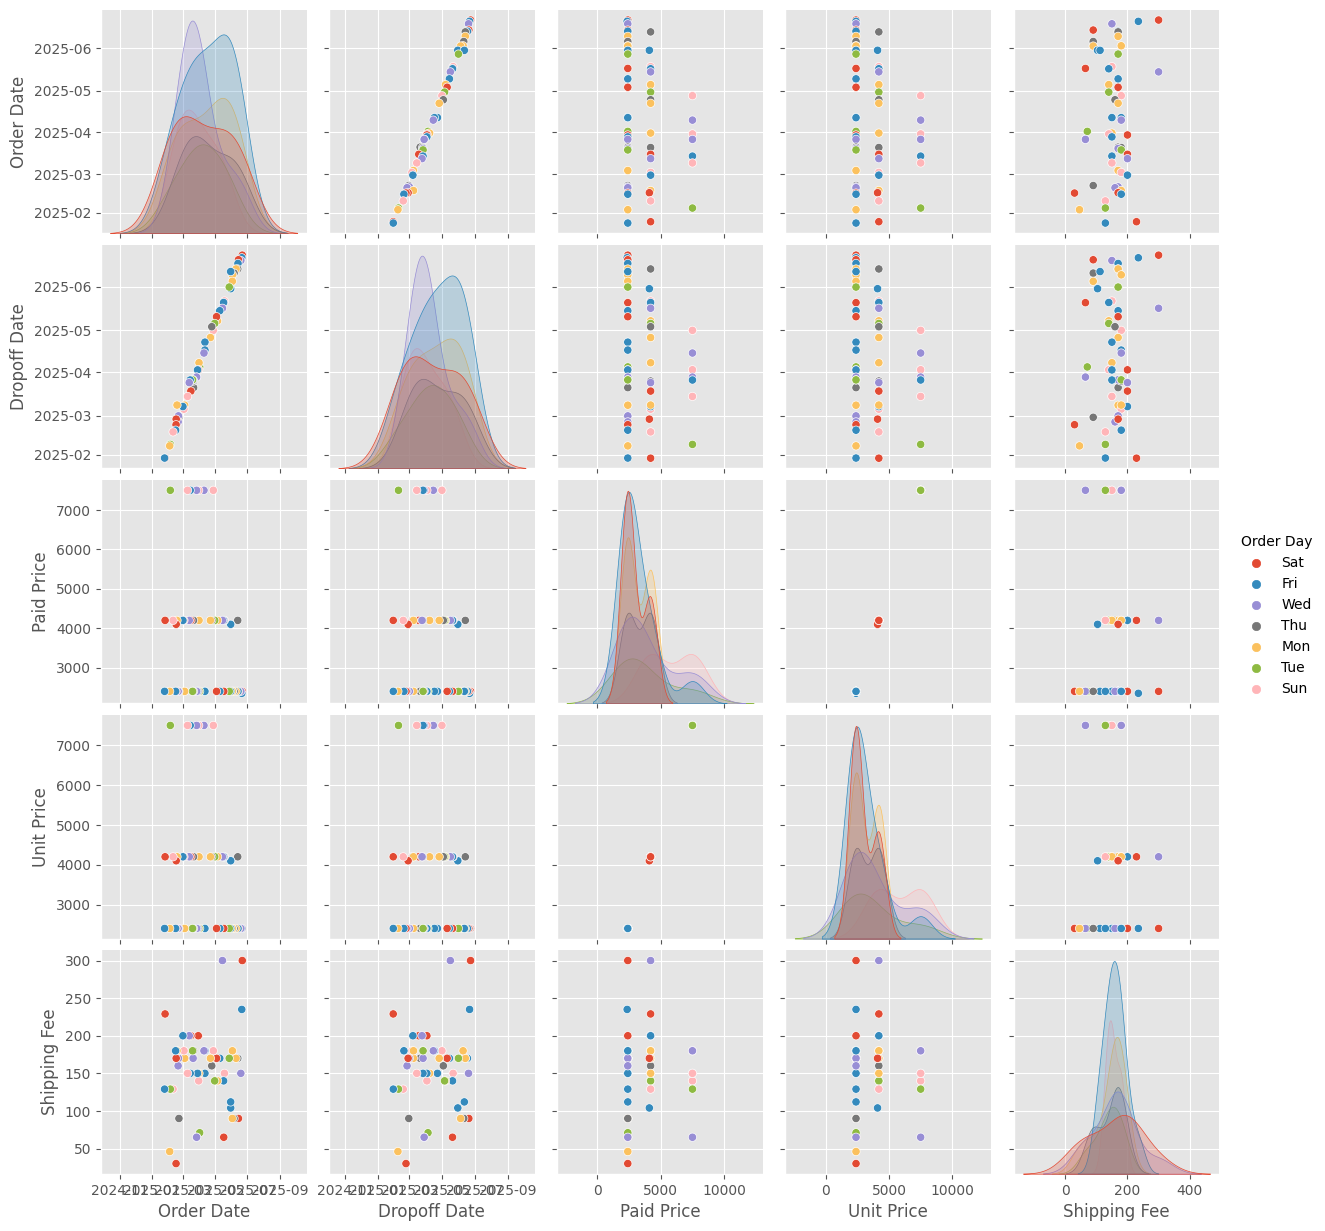

In [31]:
# Since a pairplot requires numeric or DateTime data for the axes, we can only plot using the below columns listed. The Object Dtypes can be used for Hue.

sns.pairplot(df, vars=['Order Date','Dropoff Date',# DateTime Dtype
                       'Paid Price','Unit Price', 'Shipping Fee'], #Float64 Numeric Dtype
             diag_kind = 'kde',
             hue = 'Order Day')
plt.show()

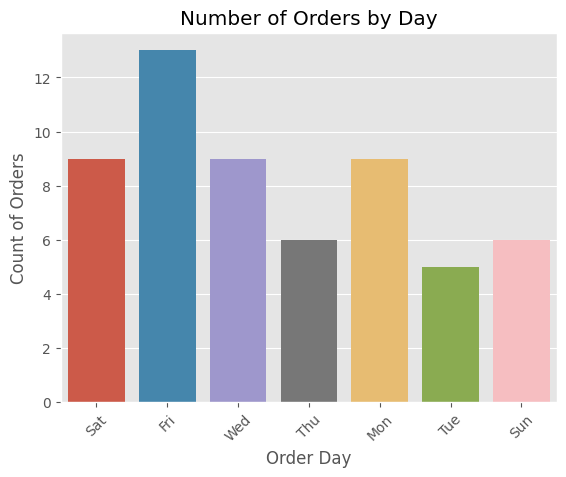

In [32]:
#Using a Countplot to see the number of orders by day of week. A fast way to quickly visualize which days get the most orders
# This shows the Frequency of orders per day
sns.countplot(df,x='Order Day')
plt.xlabel('Order Day')
plt.ylabel('Count of Orders')
plt.title('Number of Orders by Day')
plt.xticks(rotation=45)
plt.show()

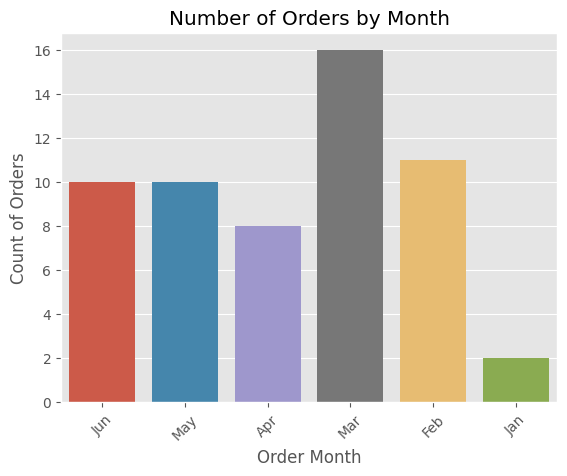

In [33]:
#This shows the frequency of orders per Month
sns.countplot(df,x='Order Month')
plt.xlabel('Order Month')
plt.ylabel('Count of Orders')
plt.title('Number of Orders by Month')
plt.xticks(rotation=45)
plt.show()

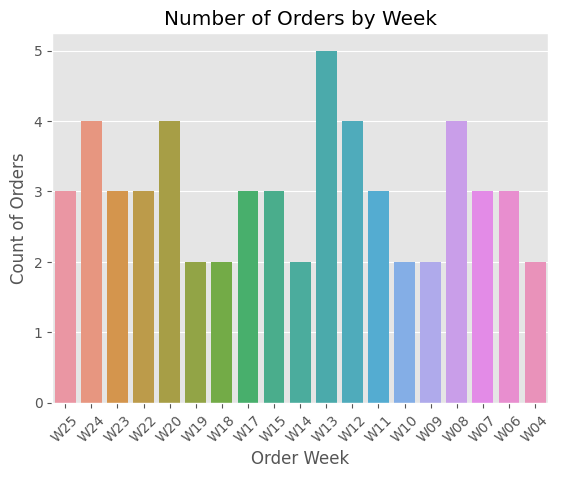

In [34]:
#This shows the frequency of orders per week
sns.countplot(df,x='Order Week')
plt.xlabel('Order Week')
plt.ylabel('Count of Orders')
plt.title('Number of Orders by Week')
plt.xticks(rotation=45)
plt.show()

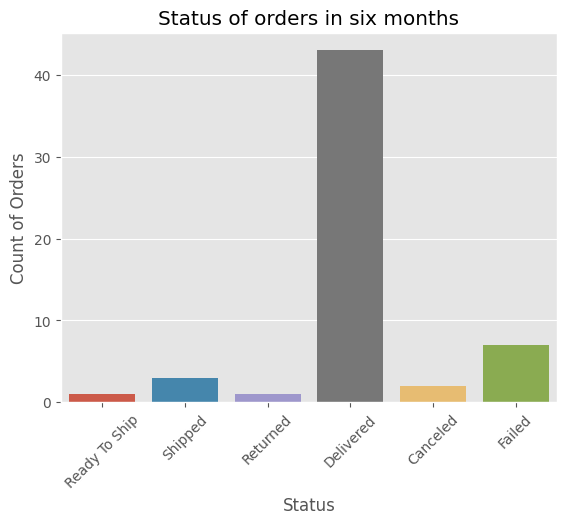

In [35]:
#This shows the status of orders whether shipped, delivered or returned
sns.countplot(df,x='Status')
plt.xlabel('Status')
plt.ylabel('Count of Orders')
plt.title('Status of orders in six months')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Checking Correlation
df_corr= df[['Order Date', 'Dropoff Date', 'Paid Price', 'Unit Price', 'Shipping Fee']].corr()

In [37]:
df_corr

,Order Date,Dropoff Date,Paid Price,Unit Price,Shipping Fee
Order Date,1.000000,0.997077,-0.201858,-0.201069,0.112317
Dropoff Date,0.997077,1.000000,-0.204708,-0.203950,0.114934
Paid Price,-0.201858,-0.204708,1.000000,0.999992,0.051376
Unit Price,-0.201069,-0.203950,0.999992,1.000000,0.052222
Shipping Fee,0.112317,0.114934,0.051376,0.052222,1.000000


<Axes: >

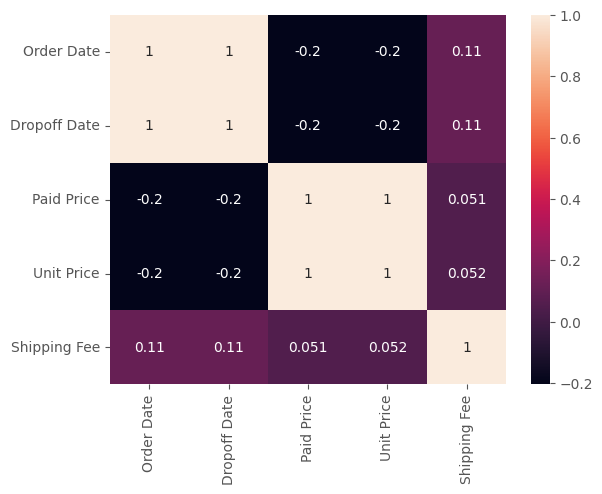

In [38]:
#Lets view it as a heatmap

sns.heatmap(df_corr,
            annot=True)

## 4) Customer Segmentation
- **Goal**: Understand my customer base to tailor marketing.
- **Analyses**:
  - Group customers by region (e.g., Nairobi vs. Mombasa) to identify high-demand areas.
  - Segment by purchase frequency (e.g., one-time vs. repeat buyers).
  - Analyze reviews/ratings to identify what drives customer satisfaction (e.g., price, delivery speed).
- **Business Insight**: If Nairobi dominates sales, focus marketing there or explore why other regions lag (e.g., delivery issues).

In [39]:
df.head()

,Seller Sku,Order Date,Dropoff Date,Customer First Name,Shipping City,Paid Price,Unit Price,Shipping Fee,Item Name,Status,Order Week,Order Month,Dropoff Week,Dropoff Month,Order Day,Dropoff Day
0,P3-256,2025-06-21 12:20:11,2025-06-23 09:31:24,Charles,Kikuyu/Gitaru/Kanyariri/Muguga,2400.0,2400.0,300.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Ready To Ship,W25,Jun,W26,Jun,Sat,Mon
1,P3-256,2025-06-20 13:35:12,2025-06-21 12:52:50,victor,Kakamega Town,2350.0,2400.0,235.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped,W25,Jun,W25,Jun,Fri,Sat
2,P3-256,2025-06-18 18:30:17,2025-06-19 13:32:55,Francis,Kondele/Migosi/ Lolwe/Carwash/Kibos,2400.0,2400.0,150.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Shipped,W25,Jun,W25,Jun,Wed,Thu
3,P3-256,2025-06-14 05:10:11,2025-06-20 02:40:29,Lawrence,Roysambu/Zimmerman,2400.0,2400.0,90.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Returned,W24,Jun,W25,Jun,Sat,Fri
4,P3-256,2025-06-13 08:25:16,2025-06-17 11:43:56,Aloise,Voi,2400.0,2400.0,170.0,"2.5 Inch SSD 256GB - SATA III SSD 6Gb/s, 2.5"" ...",Delivered,W24,Jun,W25,Jun,Fri,Tue


In [40]:
# Lets explore information about the locations where most orders come from. In our case, shipping city

df['Shipping City'].value_counts()


Shipping City
Embakasi East-GSU/Mihango/Utawala/Benedicta/Githunguri/Airways    3
Mvita-Mwembe Tayri/ Majengo/ Tononoka                             2
Awasi                                                             2
Murang'a Town                                                     2
Bungoma Town                                                      2
Mtito Andei                                                       2
Juja/highpoint/Witeithie                                          2
Meru Town                                                         2
Eldoret Town                                                      2
Karen                                                             2
Njoro                                                             1
Homa Bay Town                                                     1
Iten                                                              1
Malaba Town                                                       1
Langata - Otiende / Southlands / S

In [41]:
# Lets group the locations and find out the mean and the count showing the number of times an item was purchased

df.groupby('Shipping City')['Paid Price'].agg(['mean','count']).sort_values('mean')




,mean,count
Shipping City,,
Kakamega Town,2350.0,1
Kondele/Migosi/ Lolwe/Carwash/Kibos,2400.0,1
Starehe - Kariokor/Ziwani/Majengo/Gikomba,2400.0,1
Roysambu/Zimmerman,2400.0,1
Ongata Rongai,2400.0,1
Nyeri Town,2400.0,1
Nakuru CBD,2400.0,1
Naivasha Rd/Kawangware/ Gatina/Waithaka,2400.0,1
Murang'a Town,2400.0,2


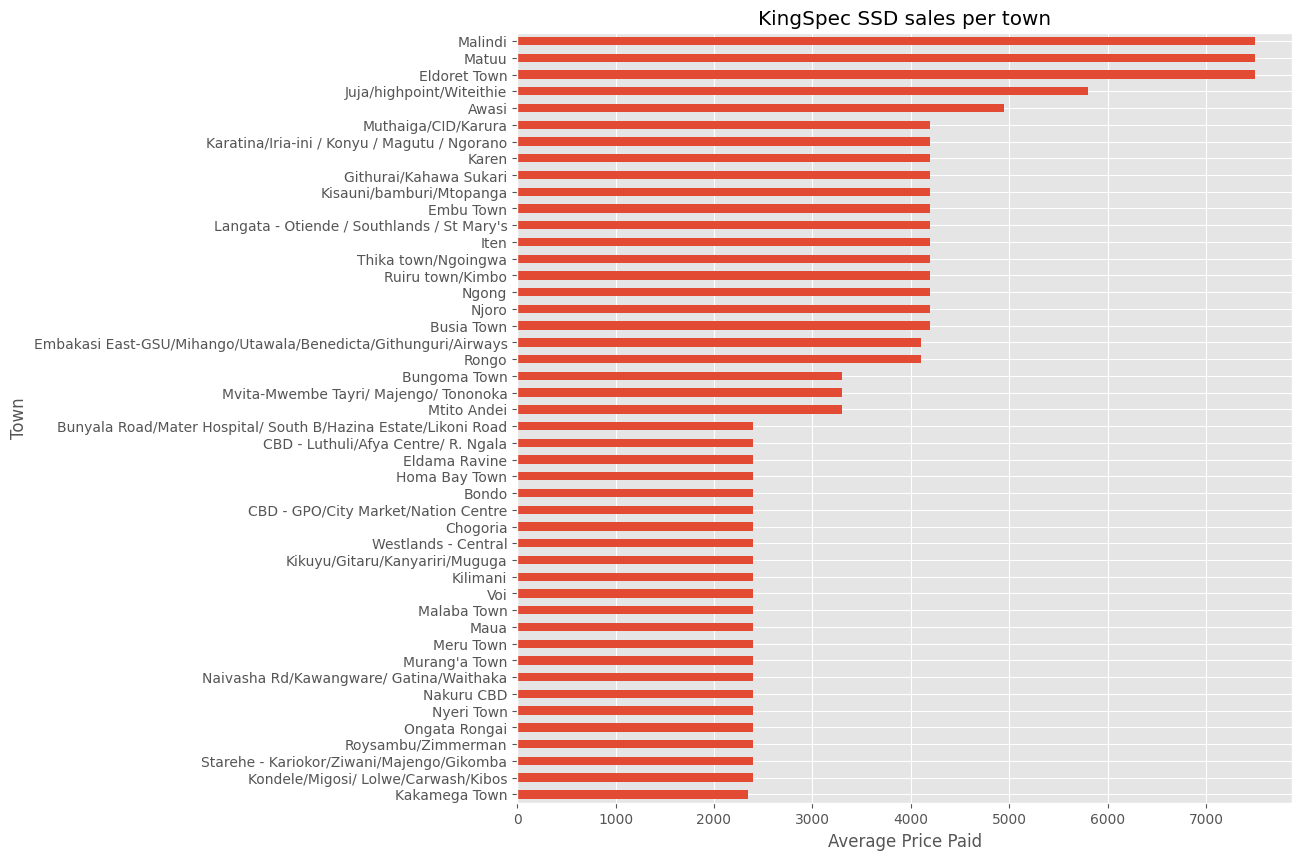

In [42]:

ax= df.groupby('Shipping City')['Paid Price'] \
    .agg(['mean','count']) \
    .sort_values('mean')['mean'] \
    .plot(kind='barh',figsize=(10,10),title ='KingSpec SSD sales per town')

ax.set_xlabel('Average Price Paid')
ax.set_ylabel('Town')
plt.show()

In [43]:
#How many products per category were sold

df.groupby('Seller Sku')['Paid Price'].agg(['count'])

,count
Seller Sku,
ENCLOSURE,4
NX-1TB 2280,7
NX-512 2280,17
P3-256,27
P3-512,2


Text(0.5, 1.0, 'KingSpec SSD quantities sold per model')

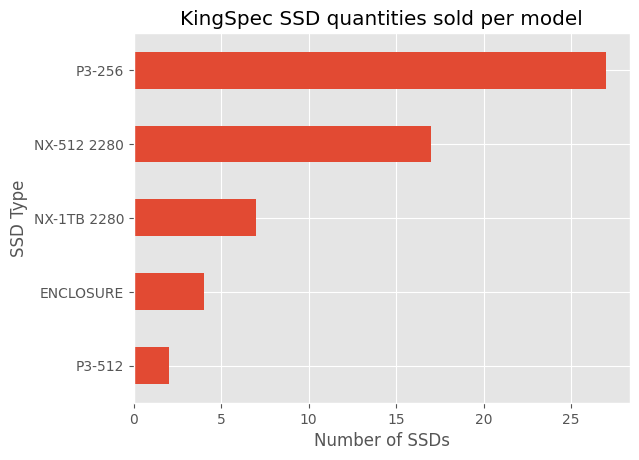

In [44]:
# Visualize it on a barplot

ax = df.groupby('Seller Sku')['Paid Price'].agg(['count']).sort_values('count')['count'].plot(kind='barh')
ax.set_xlabel('Number of SSDs')
ax.set_ylabel('SSD Type')
ax.set_title('KingSpec SSD quantities sold per model')